# **Finding a protein in multiple databases**
Before we start performing some more structural biology, we will look at how we can access existing proteomic databases, such as UniProt. We will query UniProt for our gene of interest, TP53, and take it from there.

In [ ]:
import pandas as pd
import numpy as np
import io

First, let's define a function to perform REST queries on UniProt, as follows:

For more information see the followin link: 
https://www.uniprot.org/help/api

In [ ]:
import requests
server = 'https://rest.uniprot.org/uniprotkb/search'
def do_request(server, ID='', **kwargs):
 params = ''
 req = requests.get('%s/%s%s' % (server, ID, params), params=kwargs)
 if not req.ok:
  req.raise_for_status()
 return req

In [ ]:
response1 = do_request(server, query='gene:p53 AND reviewed:true', format='tsv')

In [ ]:
with open("response1.text", "w") as f:
    f.write(response1.text)

In [ ]:
print(response1.text)

Entry	Entry Name	Reviewed	Protein names	Gene Names	Organism	Length
P04637	P53_HUMAN	reviewed	Cellular tumor antigen p53 (Antigen NY-CO-13) (Phosphoprotein p53) (Tumor suppressor p53)	TP53 P53	Homo sapiens (Human)	393
P10361	P53_RAT	reviewed	Cellular tumor antigen p53 (Tumor suppressor p53)	Tp53 P53	Rattus norvegicus (Rat)	391
P02340	P53_MOUSE	reviewed	Cellular tumor antigen p53 (Tumor suppressor p53)	Tp53 P53 Trp53	Mus musculus (Mouse)	390
O09185	P53_CRIGR	reviewed	Cellular tumor antigen p53 (Tumor suppressor p53)	TP53 P53	Cricetulus griseus (Chinese hamster) (Cricetulus barabensis griseus)	393
Q8SPZ3	P53_DELLE	reviewed	Cellular tumor antigen p53 (Tumor suppressor p53)	TP53 P53	Delphinapterus leucas (Beluga whale)	387
Q9TTA1	P53_TUPBE	reviewed	Cellular tumor antigen p53 (Tumor suppressor p53)	TP53 P53	Tupaia belangeri (Common tree shrew) (Tupaia glis belangeri)	393
P61260	P53_MACFU	reviewed	Cellular tumor antigen p53 (Tumor suppressor p53)	TP53 P53	Macaca fuscata fuscata (Japanese maca

In [ ]:
uniprot_list1 = pd.read_table(io.StringIO(response1.text))
print(uniprot_list1)

     Entry   Entry Name  Reviewed  \
0   P04637    P53_HUMAN  reviewed   
1   P10361      P53_RAT  reviewed   
2   P02340    P53_MOUSE  reviewed   
3   O09185    P53_CRIGR  reviewed   
4   Q8SPZ3    P53_DELLE  reviewed   
5   Q9TTA1    P53_TUPBE  reviewed   
6   P61260    P53_MACFU  reviewed   
7   P56424    P53_MACMU  reviewed   
8   P79892    P53_HORSE  reviewed   
9   Q29537    P53_CANLF  reviewed   
10  P56423    P53_MACFA  reviewed   
11  Q9TUB2      P53_PIG  reviewed   
12  Q42578  PER53_ARATH  reviewed   
13  Q9W678    P53_BARBU  reviewed   
14  P25035    P53_ONCMY  reviewed   
15  O12946    P53_PLAFE  reviewed   
16  O57538    P53_XIPHE  reviewed   
17  O93379    P53_ICTPU  reviewed   
18  P79820    P53_ORYLA  reviewed   
19  Q92143    P53_XIPMA  reviewed   
20  Q9W679    P53_TETMU  reviewed   

                                        Protein names  \
0   Cellular tumor antigen p53 (Antigen NY-CO-13) ...   
1   Cellular tumor antigen p53 (Tumor suppressor p53)   
2   Cellular t

In [ ]:
df = pd.read_csv("/content/response1.text", sep="\t")
df.head()

,Entry,Entry Name,Reviewed,Protein names,Gene Names,Organism,Length
0,P04637,P53_HUMAN,reviewed,Cellular tumor antigen p53 (Antigen NY-CO-13) ...,TP53 P53,Homo sapiens (Human),393
1,P10361,P53_RAT,reviewed,Cellular tumor antigen p53 (Tumor suppressor p53),Tp53 P53,Rattus norvegicus (Rat),391
2,P02340,P53_MOUSE,reviewed,Cellular tumor antigen p53 (Tumor suppressor p53),Tp53 P53 Trp53,Mus musculus (Mouse),390
3,O09185,P53_CRIGR,reviewed,Cellular tumor antigen p53 (Tumor suppressor p53),TP53 P53,Cricetulus griseus (Chinese hamster) (Cricetul...,393
4,Q8SPZ3,P53_DELLE,reviewed,Cellular tumor antigen p53 (Tumor suppressor p53),TP53 P53,Delphinapterus leucas (Beluga whale),387


**See the following link to request special fields:**
<p> https://www.uniprot.org/help/return_fields

In [ ]:
response2 = do_request(server, query='reviewed:true', fields='id,length,organism_id,organism_name,gene_names,protein_name,mass,sequence', format='tsv')

In [ ]:
with open("response2.text", "w") as f:
    f.write(response2.text)

In [ ]:
print(response2.text)

Entry Name	Length	Organism (ID)	Organism	Gene Names	Protein names	Mass	Sequence
MOTSC_HUMAN	16	9606	Homo sapiens (Human)	MT-RNR1	Mitochondrial-derived peptide MOTS-c (Mitochondrial open reading frame of the 12S rRNA-c)	2175	MRWQEMGYIFYPRKLR
UH1BL_HUMAN	1464	9606	Homo sapiens (Human)	UHRF1BP1L KIAA0701 SHIP164	UHRF1-binding protein 1-like (Syntaxin-6 Habc-interacting protein of 164 kDa)	164199	MAGIIKKQILKHLSRFTKNLSPDKINLSTLKGEGELKNLELDEEVLQNMLDLPTWLAINKVFCNKASIRIPWTKLKTHPICLSLDKVIMEMSTCEEPRSPNGPSPIATASGQSEYGFAEKVVEGISVSVNSIVIRIGAKAFNASFELSQLRIYSVNAHWEHGDLRFTRIQDPQRGEVLTFKEINWQMIRIEADATQSSHLEIMCAPVRLITNQSKIRVTLKRRLKDCNVIATKLVLILDDLLWVLTDSQLKAMVQYAKSLSEAIEKSTEQRKSMAPEPTQSSTVVASAQQVKTTQTSNAPDVNDAIVKLFNDFDVKETSHHLVISHLDLHICDDIHAKEKESNRRITGGAMQLSFTQLTIDYYPYHKAGDSCNHWMYFSDATKTKNGWANELLHEFECNVEMLKQAVKDHNVGSPPKSPTHASPQHTQTEKDYPLKGTCRTPSVLSQQSKAKLMSSSVVVRLADFNIYQVSTAEQCRSSPKSMICCNKKSLYLPQEMSAVYIEFTEYYYPDGKDFPIPSPNLYSQLNALQFTVDERSILWLNQFLLDLKQSLNQFMAVYKLNDNSKSDEHVDVRVDGLMLKFVIPSEVKSECHQDQPRAISIQS

In [ ]:
uniprot_list2 = pd.read_table(io.StringIO(response2.text))
print(uniprot_list2)

     Entry Name  Length  Organism (ID)              Organism  \
0   MOTSC_HUMAN      16           9606  Homo sapiens (Human)   
1   UH1BL_HUMAN    1464           9606  Homo sapiens (Human)   
2   POTB3_HUMAN     581           9606  Homo sapiens (Human)   
3   CLRN2_HUMAN     232           9606  Homo sapiens (Human)   
4   RHG10_HUMAN     786           9606  Homo sapiens (Human)   
5   F170A_HUMAN     330           9606  Homo sapiens (Human)   
6   ELOV7_HUMAN     281           9606  Homo sapiens (Human)   
7   SPD2B_HUMAN     911           9606  Homo sapiens (Human)   
8   FRMD3_HUMAN     597           9606  Homo sapiens (Human)   
9   TM218_HUMAN     115           9606  Homo sapiens (Human)   
10  CCD66_HUMAN     948           9606  Homo sapiens (Human)   
11   TYW5_HUMAN     315           9606  Homo sapiens (Human)   
12   GSAP_HUMAN     854           9606  Homo sapiens (Human)   
13   EME2_HUMAN     379           9606  Homo sapiens (Human)   
14  ODAD3_HUMAN     595           9606  

In [ ]:
df = pd.read_csv("/content/response2.text", sep="\t")
df.head()

,Entry Name,Length,Organism (ID),Organism,Gene Names,Protein names,Mass,Sequence
0,MOTSC_HUMAN,16,9606,Homo sapiens (Human),MT-RNR1,Mitochondrial-derived peptide MOTS-c (Mitochon...,2175,MRWQEMGYIFYPRKLR
1,UH1BL_HUMAN,1464,9606,Homo sapiens (Human),UHRF1BP1L KIAA0701 SHIP164,UHRF1-binding protein 1-like (Syntaxin-6 Habc-...,164199,MAGIIKKQILKHLSRFTKNLSPDKINLSTLKGEGELKNLELDEEVL...
2,POTB3_HUMAN,581,9606,Homo sapiens (Human),POTEB3,POTE ankyrin domain family member B3,65710,MVAEVCSMPAASAVKKPFDLRSKMGKWCHHRFPCCRGSGKSNMGTS...
3,CLRN2_HUMAN,232,9606,Homo sapiens (Human),CLRN2,Clarin-2,25446,MPGWFKKAWYGLASLLSFSSFILIIVALVVPHWLSGKILCQTGVDL...
4,RHG10_HUMAN,786,9606,Homo sapiens (Human),ARHGAP10 GRAF2,Rho GTPase-activating protein 10 (GTPase regul...,89375,MGLQPLEFSDCYLDSPWFRERIRAHEAELERTNKFIKELIKDGKNL...


Now, we can get the human p53 and use Biopython to retrieve and parse the SwissProt record:

In [ ]:
pip install biopython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**see the following link for Biopython’s API documentation;**
<b> </p> https://biopython.org/docs/latest/api/Bio.html

In [ ]:
import Bio
from Bio import ExPASy, SwissProt
p53_human = uniprot_list[uniprot_list.Organism == 'Homo sapiens (Human)']['Entry'].tolist()[0]
handle = ExPASy.get_sprot_raw(p53_human)
sp_rec= SwissProt.read(handle)

We can retrieve the following records:
* accessions
* annotation_update
* comments
* created
* cross_references
* data_class
* description
* entry_name
* features
* gene_name
* host_organism
* host_taxonomy_id
* keywords
* molecule_type
* organelle
* organism
* organism_classification
* protein_existence
* references
* seqinfo
* sequence
* sequence_length
* sequence_update
* taxonomy_id

In [ ]:
print(sp_rec.entry_name, sp_rec.sequence_length, sp_rec.gene_name)
print(sp_rec.description)
print(sp_rec.organism, sp_rec.seqinfo)
print(sp_rec.sequence)
print(sp_rec.comments)
print(sp_rec.keywords)
print(sp_rec.features)

P53_HUMAN 393 Name=TP53; Synonyms=P53;
RecName: Full=Cellular tumor antigen p53; AltName: Full=Antigen NY-CO-13; AltName: Full=Phosphoprotein p53; AltName: Full=Tumor suppressor p53;
Homo sapiens (Human). (393, 43653, 'AD5C149FD8106131')
MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLSPDDIEQWFTEDPGPDEAPRMPEAAPPVAPAPAAPTPAAPAPAPSWPLSSSVPSQKTYQGSYGFRLGFLHSGTAKSVTCTYSPALNKMFCQLAKTCPVQLWVDSTPPPGTRVRAMAIYKQSQHMTEVVRRCPHHERCSDSDGLAPPQHLIRVEGNLRVEYLDDRNTFRHSVVVPYEPPEVGSDCTTIHYNYMCNSSCMGGMNRRPILTIITLEDSSGNLLGRNSFEVRVCACPGRDRRTEEENLRKKGEPHHELPPGSTKRALPNNTSSSPQPKKKPLDGEYFTLQIRGRERFEMFRELNEALELKDAQAGKEPGGSRAHSSHLKSKKGQSTSRHKKLMFKTEGPDSD
['FUNCTION: Acts as a tumor suppressor in many tumor types; induces growth arrest or apoptosis depending on the physiological circumstances and cell type (PubMed:11025664, PubMed:12524540, PubMed:12810724, PubMed:15186775, PubMed:15340061, PubMed:17317671, PubMed:17349958, PubMed:19556538, PubMed:20673990, PubMed:20959462, PubMed:22726440, PubMed:24051492, PubMed:98

In [ ]:
from collections import defaultdict
done_features = set()
print(len(sp_rec.cross_references))
per_source = defaultdict(list)
for xref in sp_rec.cross_references:
  source = xref[0]
  per_source[source].append(xref[1:])
print(per_source.keys())
done_GOs = set()
print(len(per_source['GO']))
for annot in per_source['GO']:
  if annot[1][0] in done_GOs:
    continue
  else:
    done_GOs.add(annot[1][0])
    print(annot)
  print(len(sp_rec.features))
for feature in sp_rec.features:
  if feature[0] in done_features:
    continue
  else:
    done_features.add(feature[0])
    print(feature)

951
dict_keys(['EMBL', 'CCDS', 'PIR', 'RefSeq', 'PDB', 'PDBsum', 'AlphaFoldDB', 'BMRB', 'SMR', 'BioGRID', 'ComplexPortal', 'CORUM', 'DIP', 'ELM', 'IntAct', 'MINT', 'STRING', 'BindingDB', 'ChEMBL', 'DrugBank', 'MoonDB', 'TCDB', 'GlyGen', 'iPTMnet', 'MetOSite', 'PhosphoSitePlus', 'BioMuta', 'DMDM', 'SWISS-2DPAGE', 'CPTAC', 'EPD', 'jPOST', 'MassIVE', 'MaxQB', 'PaxDb', 'PeptideAtlas', 'PRIDE', 'ProteomicsDB', 'ABCD', 'Antibodypedia', 'CPTC', 'DNASU', 'Ensembl', 'GeneID', 'KEGG', 'MANE-Select', 'UCSC', 'CTD', 'DisGeNET', 'GeneCards', 'GeneReviews', 'HGNC', 'HPA', 'MalaCards', 'MIM', 'neXtProt', 'OpenTargets', 'Orphanet', 'PharmGKB', 'VEuPathDB', 'eggNOG', 'GeneTree', 'InParanoid', 'OMA', 'OrthoDB', 'PhylomeDB', 'TreeFam', 'PathwayCommons', 'Reactome', 'SABIO-RK', 'SignaLink', 'SIGNOR', 'BioGRID-ORCS', 'ChiTaRS', 'EvolutionaryTrace', 'GeneWiki', 'GenomeRNAi', 'Pharos', 'PRO', 'Proteomes', 'RNAct', 'Bgee', 'ExpressionAtlas', 'Genevisible', 'GO', 'CDD', 'DisProt', 'Gene3D', 'IDEAL', 'InterPro'

TypeError: ignored

# **Introducing Bio.PDB**

First, let's retrieve our models of interest, as follows:

In [189]:
from Bio import PDB
repository = PDB.PDBList()
repository.retrieve_pdb_file('1TUP', pdir='.', file_format='pdb')
repository.retrieve_pdb_file('1OLG', pdir='.', file_format='pdb')
repository.retrieve_pdb_file('1YCQ', pdir='.', file_format='pdb')

'./pdb1ycq.ent'

Let's parse our records, as shown in the following code:

In [190]:
parser = PDB.PDBParser()
p53_1tup = parser.get_structure('P 53 - DNA Binding','pdb1tup.ent')
p53_1olg = parser.get_structure('P 53 - Tetramerization','pdb1olg.ent')
p53_1ycq = parser.get_structure('P 53 - Transactivation','pdb1ycq.ent')

/usr/local/lib/python3.7/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6146.
  PDBConstructionWarning,
/usr/local/lib/python3.7/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6147.
  PDBConstructionWarning,
/usr/local/lib/python3.7/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6148.
  PDBConstructionWarning,
/usr/local/lib/python3.7/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 6149.
  PDBConstructionWarning,
/usr/local/lib/python3.7/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 6171.
  PDBConstructionWarning,
/usr/local/lib/python3.7/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6185.
  PDBConstru

You may get some warnings about the content of the file. These are usually not problematic.

Let's inspect our headers, as follows:

In [194]:
def print_pdb_headers(headers, indent=0):
  ind_text = ' ' * indent
  for header, content in headers.items():
    if type(content) == dict:
     print('\n%s%20s:' % (ind_text, header))
     print_pdb_headers(content, indent + 4)
     print()
    elif type(content) == list:
     print('%s%20s:' % (ind_text, header))
     for elem in content:
      print('%s%21s %s' % (ind_text, '->', elem))
    else:
      print('%s%20s: %s' % (ind_text, header, content))
print_pdb_headers(p53_1tup.header)

                name: tumor suppressor p53 complexed with dna
                head: antitumor protein/dna
              idcode: 1TUP
     deposition_date: 1995-07-11
        release_date: 1995-07-11
    structure_method: x-ray diffraction
          resolution: 2.2
 structure_reference:
                   -> n.p.pavletich,k.a.chambers,c.o.pabo the dna-binding domain of p53 contains the four conserved regions and the major mutation hot spots genes dev. v. 7 2556 1993 issn 0890-9369 
                   -> b.vogelstein,k.w.kinzler p53 function and dysfunction cell(cambridge,mass.) v. 70 523 1992 issn 0092-8674 
   journal_reference: y.cho,s.gorina,p.d.jeffrey,n.p.pavletich crystal structure of a p53 tumor suppressor-dna complex: understanding tumorigenic mutations. science v. 265 346 1994 issn 0036-8075 8023157 
              author: Y.Cho,S.Gorina,P.D.Jeffrey,N.P.Pavletich

            compound:

                       1:
                        misc: 
                    molecule: dna (5

Headers are parsed as a dictionary of dictionaries. As such, we will use a
recursive function to parse them. This function will increase indentation for ease of reading, and annotate lists of elements with the → prefix.

We want to know the content of each chain on these files; for this, let's take a look at the COMPND records:

In [195]:
print(p53_1tup.header['compound'])
print(p53_1olg.header['compound'])
print(p53_1ycq.header['compound'])

{'1': {'misc': '', 'molecule': "dna (5'-d(*tp*tp*tp*cp*cp*tp*ap*gp*ap*cp*tp*tp*gp*cp*cp*cp*a p*ap*tp*tp*a)-3') ", 'chain': 'e', 'engineered': 'yes'}, '2': {'misc': '', 'molecule': "dna (5'-d(*ap*tp*ap*ap*tp*tp*gp*gp*gp*cp*ap*ap*gp*tp*cp*tp*a p*gp*gp*ap*a)-3') ", 'chain': 'f', 'engineered': 'yes'}, '3': {'misc': '', 'molecule': 'protein (p53 tumor suppressor )', 'chain': 'a, b, c', 'engineered': 'yes'}}
{'1': {'misc': '', 'molecule': 'tumor suppressor p53 (oligomerization domain)', 'chain': 'a, b, c, d', 'engineered': 'yes'}}
{'1': {'misc': '', 'molecule': 'mdm2', 'chain': 'a', 'synonym': 'mdm2', 'engineered': 'yes'}, '2': {'misc': '', 'molecule': 'p53', 'chain': 'b', 'fragment': 'residues 13 - 29', 'engineered': 'yes'}}


This will return all compound headers printed in the preceding code.
Unfortunately, this is not the best way to get information on chains. An
alternative would be to get DBREF records, but Biopython's parser is currently not able to access these. Having said that, using a tool like grep will easily extract this information.
<p>Note that for the 1TUP model, A, B, and C chains are from the protein, and E and F chains are from the DNA. This information will be useful in the future.

Let's do a top-down analysis of each PDB file. For now, let's just get all of the chains, the number of residues, and atoms per chain, as follows:

In [210]:
def describe_model(name, pdb):
  print()
  for model in pdb:
   for chain in model:
     print('%s - Chain: %s. Number of residues: %d. Number of atoms: %d.' % (name, chain.id, len(chain), len(list(chain.get_atoms()))))

describe_model('1TUP', p53_1tup)
describe_model('1OLG', p53_1olg)
describe_model('1YCQ', p53_1ycq)


1TUP - Chain: E. Number of residues: 43. Number of atoms: 442.
1TUP - Chain: F. Number of residues: 35. Number of atoms: 449.
1TUP - Chain: A. Number of residues: 395. Number of atoms: 1734.
1TUP - Chain: B. Number of residues: 265. Number of atoms: 1593.
1TUP - Chain: C. Number of residues: 276. Number of atoms: 1610.

1OLG - Chain: A. Number of residues: 42. Number of atoms: 698.
1OLG - Chain: B. Number of residues: 42. Number of atoms: 698.
1OLG - Chain: C. Number of residues: 42. Number of atoms: 698.
1OLG - Chain: D. Number of residues: 42. Number of atoms: 698.

1YCQ - Chain: A. Number of residues: 123. Number of atoms: 741.
1YCQ - Chain: B. Number of residues: 16. Number of atoms: 100.


Let's get all non-standard residues (HETATM), with the exception of 6. Water, in
the 1TUP model, as shown in the following code:

In [211]:
for residue in p53_1tup.get_residues():
  if residue.id[0] in [' ', 'W']:
    continue
print(residue.id)

('W', 2363, ' ')


We have three zincs, one on each of the protein chains. Let's take a look at a residue: 7.

In [212]:
res = next(p53_1tup[0]['A'].get_residues())
print(res)
for atom in res:
  print(atom, atom.serial_number, atom.element)
p53_1tup[0]['A'][94]['CA']

<Residue SER het=  resseq=94 icode= >
<Atom N> 858 N
<Atom CA> 859 C
<Atom C> 860 C
<Atom O> 861 O
<Atom CB> 862 C
<Atom OG> 863 O


<Atom CA>

Note the last statement. It is there just to show you that you can directly access an Atom by resolving model, chain, Residue, and finally, the Atom.

Finally, let's export the protein fragment to a FASTA file, as follows:

In [215]:
from Bio.SeqIO import PdbIO, FastaIO
def get_fasta(pdb_file, fasta_file, transfer_ids=None):
  fasta_writer = FastaIO.FastaWriter(fasta_file)
  fasta_writer.write_header()
  for rec in PdbIO.PdbSeqresIterator(pdb_file):
    if len(rec.seq) == 0:
      continue
    if transfer_ids is not None and rec.id not in transfer_ids:
      continue
    print(rec.id, rec.seq, len(rec.seq))
    fasta_writer.write_record(rec)
get_fasta(open('pdb1tup.ent'), open('1tup.fasta', 'w'),
transfer_ids=['1TUP:B'])
get_fasta(open('pdb1olg.ent'), open('1olg.fasta', 'w'),
transfer_ids=['1OLG:B'])
get_fasta(open('pdb1ycq.ent'), open('1ycq.fasta', 'w'),
transfer_ids=['1YCQ:B'])

1TUP:B SSSVPSQKTYQGSYGFRLGFLHSGTAKSVTCTYSPALNKMFCQLAKTCPVQLWVDSTPPPGTRVRAMAIYKQSQHMTEVVRRCPHHERCSDSDGLAPPQHLIRVEGNLRVEYLDDRNTFRHSVVVPYEPPEVGSDCTTIHYNYMCNSSCMGGMNRRPILTIITLEDSSGNLLGRNSFEVRVCACPGRDRRTEEENLRKKGEPHHELPPGSTKRALPNNT 219
1OLG:B KKKPLDGEYFTLQIRGRERFEMFRELNEALELKDAQAGKEPG 42
1YCQ:B PLSQETFSDLWKLLPEN 17


If you inspect the protein chain, you will see that they are equal in each model, so we export a single one. In the case of 1YCQ, we export the smallest one, because the biggest one is not p53-related. As you can see, here, we are using Bio.SeqIO, not Bio.PDB.

# **Extracting more information from a PDB file**

Here, we will continue our exploration of the record structure produced by Bio.PDB from PDB files.

First, let's retrieve 1TUP pdb file as follows:

In [216]:
from Bio import PDB
repository = PDB.PDBList()
parser = PDB.PDBParser()
repository.retrieve_pdb_file('1TUP', pdir='.', file_format='pdb')
#XXX
p53_1tup = parser.get_structure('P 53', 'pdb1tup.ent')

Structure exists: './pdb1tup.ent' 


/usr/local/lib/python3.7/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6146.
  PDBConstructionWarning,
/usr/local/lib/python3.7/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6147.
  PDBConstructionWarning,
/usr/local/lib/python3.7/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6148.
  PDBConstructionWarning,
/usr/local/lib/python3.7/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 6149.
  PDBConstructionWarning,
/usr/local/lib/python3.7/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 6171.
  PDBConstructionWarning,
/usr/local/lib/python3.7/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6185.
  PDBConstru

Then, extract some atom-related statistics:

In [217]:
from collections import defaultdict
atom_cnt = defaultdict(int)
atom_chain = defaultdict(int)
atom_res_types = defaultdict(int)
for atom in p53_1tup.get_atoms():
  my_residue = atom.parent
  my_chain = my_residue.parent
  atom_chain[my_chain.id] += 1
  if my_residue.resname != 'HOH':
    atom_cnt[atom.element] += 1
  atom_res_types[my_residue.resname] += 1
print(dict(atom_res_types))
print(dict(atom_chain))
print(dict(atom_cnt))

{'DT': 257, 'DC': 152, 'DA': 270, 'DG': 176, 'HOH': 384, 'SER': 323, 'VAL': 315, 'PRO': 294, 'GLN': 189, 'LYS': 135, 'THR': 294, 'TYR': 288, 'GLY': 156, 'PHE': 165, 'ARG': 561, 'LEU': 336, 'HIS': 210, 'ALA': 105, 'CYS': 180, 'ASN': 216, 'MET': 144, 'TRP': 42, 'ASP': 192, 'ILE': 144, 'GLU': 297, 'ZN': 3}
{'E': 442, 'F': 449, 'A': 1734, 'B': 1593, 'C': 1610}
{'O': 1114, 'C': 3238, 'N': 1001, 'P': 40, 'S': 48, 'ZN': 3}


This will print information on the atom's residue type, number of atoms per
chain, and quantity per element, as follows:
<p> {' DT': 257, ' DC': 152, ' DA': 270, ' DG': 176, 'HOH': 384, 'SER': 323, 'VAL': 315, 'PRO': 294, 'GLN': 189, 'LYS': 135, 'THR': 294, 'TYR': 288, 'GLY': 156, 'PHE': 165, 'ARG': 561, 'LEU': 336, 'HIS': 210, 'ALA': 105, 'CYS': 180, 'ASN': 216, 'MET': 144, 'TRP': 42, 'ASP': 192, 'ILE': 144, 'GLU': 297, ' ZN': 3} </p>
<p> {'E': 442, 'F': 449, 'A': 1734, 'B': 1593, 'C': 1610} </p>
{'O': 1114, 'C': 3238, 'N': 1001, 'P': 40, 'S': 48, 'ZN': 3}

Note that the preceding number of residues is not the proper number of residues,
but the amount of times that a certain residue type is referred (it adds up to the number of atoms, not residues).

Note the water (W), nucleotide (DA, DC, DG, and DT), and zinc (ZN) residues, which add to the amino acid ones.

Now, let's count the instance per residue and the number of residues per chain:

In [219]:
res_types = defaultdict(int)
res_per_chain = defaultdict(int)
for residue in p53_1tup.get_residues():
  res_types[residue.resname] += 1
  res_per_chain[residue.parent.id] +=1
print(dict(res_types))
print(dict(res_per_chain))

{'DT': 13, 'DC': 8, 'DA': 13, 'DG': 8, 'HOH': 384, 'SER': 54, 'VAL': 45, 'PRO': 42, 'GLN': 21, 'LYS': 15, 'THR': 42, 'TYR': 24, 'GLY': 39, 'PHE': 15, 'ARG': 51, 'LEU': 42, 'HIS': 21, 'ALA': 21, 'CYS': 30, 'ASN': 27, 'MET': 18, 'TRP': 3, 'ASP': 24, 'ILE': 18, 'GLU': 33, 'ZN': 3}
{'E': 43, 'F': 35, 'A': 395, 'B': 265, 'C': 276}


We can also get the bounds of a set of atoms:

In [220]:
import sys
def get_bounds(my_atoms):
  my_min = [sys.maxsize] * 3
  my_max = [-sys.maxsize] * 3
  for atom in my_atoms:
    for i, coord in enumerate(atom.coord):
      if coord < my_min[i]:
        my_min[i] = coord
      if coord > my_max[i]:
        my_max[i] = coord
  return my_min, my_max

chain_bounds = {}
for chain in p53_1tup.get_chains():
  print(chain.id, get_bounds(chain.get_atoms()))
  chain_bounds[chain.id] = get_bounds(chain.get_atoms())
print(get_bounds(p53_1tup.get_atoms()))

E ([22.989, 6.224, 68.526], [83.134, 52.07, 93.047])
F ([18.075, 17.921, 67.133], [81.553, 51.854, 92.927])
A ([47.913, 3.146, 35.011], [101.837, 52.296, 81.497])
B ([46.526, -9.607, 61.584], [94.363, 37.123, 108.068])
C ([14.611, -26.648, 60.367], [62.142, 18.871, 110.81])
([14.611, -26.648, 35.011], [101.837, 52.296, 110.81])


A set of atoms can be a whole model, a chain, a residue, or any subset you are
interested in. In this case, we will print boundaries for all chains and the whole model. Numbers convey little intuition, so we will get a little bit more graphical.

To have a notion of the size of each chain, a plot is probably more informative
than the numbers in the preceding code:

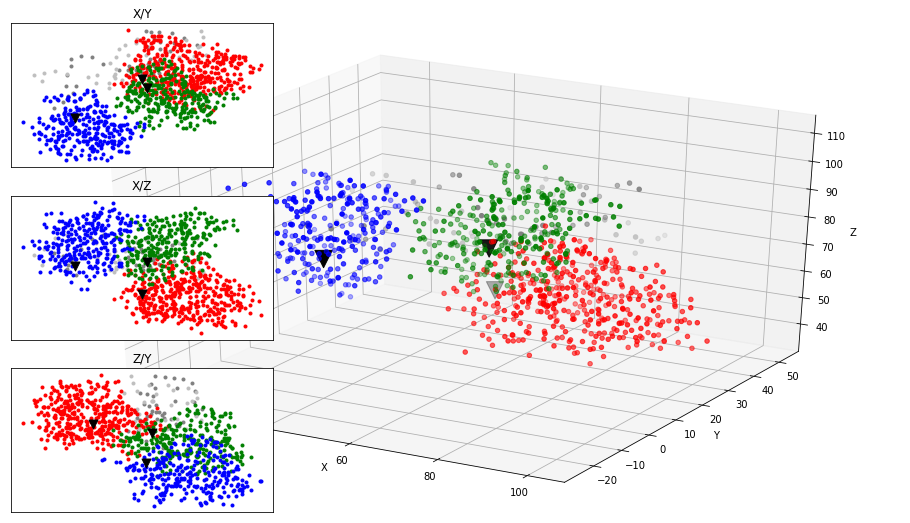

In [221]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(16, 9))
ax3d = fig.add_subplot(111, projection='3d')
ax_xy = fig.add_subplot(331)
ax_xy.set_title('X/Y')
ax_xz = fig.add_subplot(334)
ax_xz.set_title('X/Z')
ax_zy = fig.add_subplot(337)
ax_zy.set_title('Z/Y')
color = {'A': 'r', 'B': 'g', 'C': 'b', 'E': '0.5', 'F': '0.75'}
zx, zy, zz = [], [], []
for chain in p53_1tup.get_chains():
  xs, ys, zs = [], [], []
  for residue in chain.get_residues():
    ref_atom = next(residue.get_iterator())
    x, y, z = ref_atom.coord
    if ref_atom.element == 'ZN':
      zx.append(x)
      zy.append(y)
      zz.append(z)
      continue
    xs.append(x)
    ys.append(y)
    zs.append(z)
  ax3d.scatter(xs, ys, zs, color=color[chain.id])
  ax_xy.scatter(xs, ys, marker='.', color=color[chain.id])
  ax_xz.scatter(xs, zs, marker='.', color=color[chain.id])
  ax_zy.scatter(zs, ys, marker='.', color=color[chain.id])
ax3d.set_xlabel('X')
ax3d.set_ylabel('Y')
ax3d.set_zlabel('Z')
ax3d.scatter(zx, zy, zz, color='k', marker='v', s=300)
ax_xy.scatter(zx, zy, color='k', marker='v', s=80)
ax_xz.scatter(zx, zz, color='k', marker='v', s=80)
ax_zy.scatter(zz, zy, color='k', marker='v', s=80)
for ax in [ax_xy, ax_xz, ax_zy]:
  ax.get_yaxis().set_visible(False)
  ax.get_xaxis().set_visible(False)

There are plenty of molecular visualization tools. Indeed, we will discuss PyMOL
later. However, matplotlib is enough for some simple visualization. The most
important point about matplotlib is that it's stable and very easy to integrate
into reliable production code.
<p>
In the chart, we performed a 3D plot of chains, with the DNA in grey
and the protein chains in different colors. We also plot planar projections (X/Y, X/Z, and Z/Y) on the left-hand side in the following graph:

# **Computing molecular distances on a PDB file**

Here, we will find atoms closer to three zincs in the 1TUP model. We will consider several distances to these zincs. We will take this opportunity to discuss the performance of algorithms.

Let's load our model as follows:

In [222]:
from Bio import PDB
repository = PDB.PDBList()
parser = PDB.PDBParser()
repository.retrieve_pdb_file('1TUP', pdir='.', file_format='pdb')
p53_1tup = parser.get_structure('P 53', 'pdb1tup.ent')

Structure exists: './pdb1tup.ent' 


/usr/local/lib/python3.7/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6146.
  PDBConstructionWarning,
/usr/local/lib/python3.7/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6147.
  PDBConstructionWarning,
/usr/local/lib/python3.7/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6148.
  PDBConstructionWarning,
/usr/local/lib/python3.7/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 6149.
  PDBConstructionWarning,
/usr/local/lib/python3.7/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 6171.
  PDBConstructionWarning,
/usr/local/lib/python3.7/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6185.
  PDBConstru

We will now get our zincs, against which we will perform later comparisons:

In [ ]:
zns = []
for atom in p53_1tup.get_atoms():
  if atom.element == 'ZN':
    zns.append(atom)
  for zn in zns:
   print(zn, zn.coord)

You should see three zinc atoms.

Now, let's define a function to get the distance between one atom and a set of other atoms, as follows:

In [235]:
import math
def get_closest_atoms(pdb_struct, ref_atom, distance):
  atoms = {}
  rx, ry, rz = ref_atom.coord
  for atom in pdb_struct.get_atoms():
    if atom == ref_atom:
      continue
    x, y, z = atom.coord
    my_dist = math.sqrt((x - rx)**2 + (y - ry)**2 + (z - rz)**2)
    if my_dist < distance:
      atoms[atom] = my_dist
  return atoms

We get coordinates for our reference atom and then iterate over our desired
comparison list. If an atom is close enough, it's added to the return list.

We now compute atoms near our zincs, the distance of which is up to 4 Ångströms for our model:

In [236]:
for zn in zns:
  print()
  print(zn.coord)
  atoms = get_closest_atoms(p53_1tup, zn, 4)
  for atom, distance in atoms.items():
    print(atom.element, distance, atom.coord)


[58.108 23.242 57.424]
C 3.4080117696286854 [57.77  21.214 60.142]
S 2.3262243799594877 [57.065 21.452 58.482]
C 3.4566537492335123 [58.886 20.867 55.036]
C 3.064120559761192 [58.047 22.038 54.607]
N 1.9918273537290707 [57.755 23.073 55.471]
C 2.9243719601324525 [56.993 23.943 54.813]
C 3.857729198122736 [61.148 25.061 55.897]
C 3.62725094648044 [61.61  24.087 57.001]
S 2.2789209624943494 [60.317 23.318 57.979]
C 3.087214470667822 [57.205 25.099 59.719]
S 2.2253158446520818 [56.914 25.054 57.917]

[60.108 17.981 75.931]
C 3.41769274437124 [57.593 15.783 75.207]
S 2.3254721582053093 [58.586 17.082 74.42 ]
C 3.4672070967122894 [62.272 17.174 73.345]
C 3.1139134725185587 [62.061 18.615 73.59 ]
N 2.0564599972249455 [61.366 19.056 74.71 ]
C 2.985233217423681 [61.332 20.382 74.647]
C 3.805126390272999 [62.573 18.263 78.816]
C 3.1803200512467478 [61.521 17.136 78.652]
S 2.2070404885225816 [61.287 16.447 76.993]
C 3.2038921042012745 [57.624 18.417 77.907]
S 2.242320906916762 [58.978 19.402 77

Here, we show the result for the first zinc, including the element, distance, and coordinates:
<p> [58.108 23.242 57.424]
<p> C 3.4080117696286854 [57.77 21.214 60.142]
<p> S 2.3262243799594877 [57.065 21.452 58.482]
<p> C 3.4566537492335123 [58.886 20.867 55.036]
<p> C 3.064120559761192 [58.047 22.038 54.607]
<p> N 1.9918273537290707 [57.755 23.073 55.471]
<p> C 2.9243719601324525 [56.993 23.943 54.813]
<p> C 3.857729198122736 [61.148 25.061 55.897]
<p> C 3.62725094648044 [61.61 24.087 57.001]
<p> S 2.2789209624943494 [60.317 23.318 57.979]
<p> C 3.087214470667822 [57.205 25.099 59.719]
<p> S 2.2253158446520818 [56.914 25.054 57.917]

We only have three zincs, so the number of computations is quite reduced.
However, imagine that we had more, or that we were doing a pairwise
comparison among all atoms in the set (remember that the number of
comparisons grows quadratically with the number of atoms in a pairwise case).
Although our case is small, it's not difficult to forecast use cases, with more
comparisons taking a lot of time. We will get back to this soon.

Let's see how many atoms we get as we increase the distance:

In [237]:
for distance in [1, 2, 4, 8, 16, 32, 64, 128]:
  my_atoms = []
  for zn in zns:
    atoms = get_closest_atoms(p53_1tup, zn, distance)
    my_atoms.append(len(atoms))
  print(distance, my_atoms)

1 [0, 0, 0]
2 [1, 0, 0]
4 [11, 11, 12]
8 [109, 113, 106]
16 [523, 721, 487]
32 [2381, 3493, 2053]
64 [5800, 5827, 5501]
128 [5827, 5827, 5827]


As we have seen before, this specific case is not very expensive, but let's time this anyway:

In [238]:
import timeit
nexecs = 10
print(timeit.timeit('get_closest_atoms(p53_1tup, zns[0], 4.0)', 'from __main__ import get_closest_atoms, p53_1tup, zns', number=nexecs) / nexecs * 1000)

129.2599408996466


Here, we will use the timeit module to execute this function 10 times and then
print the result in milliseconds. We pass the function as a string and pass yet
another string with the necessary imports to make this function work. On a
Notebook, you are probably aware of the %timeit magic and how it makes your
life much easier in this case. This takes roughly 40 milliseconds on the machine
where the code was tested. Obviously, on your computer, you will get somewhat
different results.

Can we do better? Let's consider a different distance function, as shown in the following code:

In [240]:
def get_closest_alternative(pdb_struct, ref_atom, distance):
  atoms = {}
  rx, ry, rz = ref_atom.coord
  for atom in pdb_struct.get_atoms():
    if atom == ref_atom:
      continue
    x, y, z = atom.coord
    if abs(x - rx) > distance or abs(y - ry) > distance or abs(z - rz) > distance:
      continue
    my_dist = math.sqrt((x - rx)**2 + (y - ry)**2 + (z - rz)**2)
    if my_dist < distance:
      atoms[atom] = my_dist
  return atoms

So, we take the original function and add a very simplistic if with distances. The rationale for this is that the computational cost of the square root, and maybe the float power operation, is very expensive, so we will try to avoid it. However, for all atoms that are closer than the target distance in any dimension, this function will be more expensive.

Now, let's time against it:

In [241]:
print(timeit.timeit('get_closest_alternative(p53_1tup, zns[0], 4.0)', 'from __main__ import get_closest_alternative, p53_1tup, zns', number=nexecs) / nexecs * 1000)

47.38209130009636


On the same machine that we used in the preceding example, we have 16
milliseconds, that is, it is roughly three times faster.
<p> However, is it always better? Let's compare the cost with different distances, as follows:

In [242]:
print('Standard')
for distance in [1, 4, 16, 64, 128]:
  print(timeit.timeit('get_closest_atoms(p53_1tup, zns[0], distance)', 'from __main__ import get_closest_atoms, p53_1tup, zns, distance', number=nexecs) / nexecs * 1000)
print('Optimized')
for distance in [1, 4, 16, 64, 128]:
  print(timeit.timeit('get_closest_alternative(p53_1tup, zns[0], distance)', 'from __main__ import get_closest_alternative, p53_1tup, zns, distance',
number=nexecs) / nexecs * 1000)

Standard
123.98201929972856
69.18991959973937
69.15260530004161
75.58726339993882
74.91101619962137
Optimized
27.50301970008877
27.50160860014148
45.30030970054213
116.82565930022974
115.7584027001576


Note that the cost of the Standard version is mostly constant, whereas the Optimized version varies with the distance to get the closest atoms; the larger the distance, the more cases will be computed using the extra if, plus the square root, making the function more expensive.
<p> The larger point here is that you can probably code functions that are more efficient using smart computation shortcuts, but the complexity cost may change qualitatively. In the preceding case, I suggest that the second function is more efficient for all realistic and interesting cases when you're trying to find the closest atoms. However, you have to be careful while designing your own versions of optimized algorithms.

# **Performing geometric operations**

We will now perform computations with geometry information, including computing the center of the mass of chains and of whole models.

First, let's retrieve the data:

In [243]:
from Bio import PDB
repository = PDB.PDBList()
parser = PDB.PDBParser()
repository.retrieve_pdb_file('1TUP', pdir='.', file_format='pdb')
p53_1tup = parser.get_structure('P 53', 'pdb1tup.ent')

Structure exists: './pdb1tup.ent' 


/usr/local/lib/python3.7/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6146.
  PDBConstructionWarning,
/usr/local/lib/python3.7/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6147.
  PDBConstructionWarning,
/usr/local/lib/python3.7/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6148.
  PDBConstructionWarning,
/usr/local/lib/python3.7/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 6149.
  PDBConstructionWarning,
/usr/local/lib/python3.7/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 6171.
  PDBConstructionWarning,
/usr/local/lib/python3.7/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6185.
  PDBConstru

Then, let's recall the type of residues that we have with the following code:

In [244]:
my_residues = set()
for residue in p53_1tup.get_residues():
  my_residues.add(residue.id[0])
print(my_residues)

{'H_ZN', ' ', 'W'}


So, we have H_ ZN (zinc) and W (water), which are HETATMs; the vast majority
are standard PDB atoms.
<p> Let's compute the masses for all chains, zincs, and waters using the following code:

In [245]:
def get_mass(atoms, accept_fun=lambda atom: atom.parent.id[0] != 'W'):
  return sum([atom.mass for atom in atoms if accept_fun(atom)])

chain_names = [chain.id for chain in p53_1tup.get_chains()]
my_mass = np.ndarray((len(chain_names), 3))
for i, chain in enumerate(p53_1tup.get_chains()):
  my_mass[i, 0] = get_mass(chain.get_atoms())
  my_mass[i, 1] = get_mass(chain.get_atoms(),
    accept_fun=lambda atom: atom.parent.id[0] not in [' ', 'W'])
  my_mass[i, 2] = get_mass(chain.get_atoms(),
    accept_fun=lambda atom: atom.parent.id[0] == 'W')
masses = pd.DataFrame(my_mass, index=chain_names, columns=['No Water','Zincs', 'Water'])
print(masses) # masses

      No Water  Zincs      Water
E   6068.04412   0.00   351.9868
F   6258.20442   0.00   223.9916
A  20548.26300  65.39  3167.8812
B  20368.18840  65.39  1119.9580
C  20466.22540  65.39  1279.9520


The get_mass function returns the mass of all atoms in the list that pass an
acceptance criterion function. The default acceptance criterion is not to be a water residue.
<p> We then compute the mass for all chains. We have three versions: just amino
acids, zincs, and waters. Zinc does nothing more than detect a single atom per
chain in this model. The output is as follows:

<p>     No Water     Zincs      Water
<p> E   6068.04412   0.00     351.9868
<p> F   6258.20442   0.00   223.9916
<p> A   20548.26300  65.39  3167.8812
<p> B   20368.18840  65.39  1119.9580
<p> C   20466.22540  65.39  1279.9520

Let's compute the geometric center and center of mass of the model, as follows:

In [246]:
def get_center(atoms,
  weight_fun=lambda atom: 1 if atom.parent.id[0] != 'W' else 0):
  xsum = ysum = zsum = 0.0
  acum = 0.0
  for atom in atoms:
    x, y, z = atom.coord
    weight = weight_fun(atom)
    acum += weight
    xsum += weight * x
    ysum += weight * y
    zsum += weight * z
  return xsum / acum, ysum / acum, zsum / acum
print(get_center(p53_1tup.get_atoms()))
print(get_center(p53_1tup.get_atoms(),
weight_fun=lambda atom: atom.mass if atom.parent.id[0] != 'W' else 0))

(58.296333984624454, 15.48705585839803, 78.40529502795778)
(58.12261138092647, 15.751286500376127, 78.37537036885965)


First, we define a weighted function to get the coordinates of the center. The
default function will treat all atoms as equal, as long as they are not a water
residue.
<p> We then compute the geometric center and the center of mass by redefining the weight function with a value of each atom equal to its mass. The geometric
center is computed, irrespective of its molecular weights.
For example, you may want to compute the center of mass of the protein without
DNA chains.
<p> Let's compute the center of mass and the geometric center of each chain, as follows:

In [248]:
my_center = np.ndarray((len(chain_names), 6))
for i, chain in enumerate(p53_1tup.get_chains()):
  x, y, z = get_center(chain.get_atoms())
  my_center[i, 0] = x
  my_center[i, 1] = y
  my_center[i, 2] = z
  x, y, z = get_center(chain.get_atoms(),
    weight_fun=lambda atom: atom.mass if atom.parent.id[0] != 'W' else 0)
  my_center[i, 3] = x
  my_center[i, 4] = y
  my_center[i, 5] = z
weights = pd.DataFrame(my_center, index=chain_names, columns=['X', 'Y', 'Z', 'X (Mass)', 'Y (Mass)', 'Z (Mass)'])
print(weights) # weights

           X          Y          Z   X (Mass)   Y (Mass)   Z (Mass)
E  49.727231  32.744879  81.253417  49.708513  32.759725  81.207395
F  51.982368  33.843370  81.578795  52.002223  33.820064  81.624394
A  72.990763  28.825429  56.714012  72.822668  28.810327  56.716117
B  67.810026  12.624435  88.656590  67.729100  12.724130  88.545659
C  38.221565  -5.010494  88.293141  38.169364  -4.915395  88.166711


# **Parsing mmCIF files using Biopython**

The mmCIF file format is probably the future. Biopython doesn't have full functionality to work with it yet, but we will take a look at what is here now.

As Bio.PDB is not able to automatically download mmCIF files, you need to get your protein file and rename it to 1tup.cif.